# Sobre o notebook:

**Problema principal: identificar a loja que alcançou o maior desempenho durante o ano.**


Objetivos:

- Estudar o dados referentes ao dataset de vendas(Contoso - Vendas  - 2017.csv) que irão para as análises;
- Verificar a possibilidade de tratamento dos dados;

**O que se trata esse dataset?**

- Refletem o desempenho das vendas das lojas associadas, de acordo com a quantidade vendida dos produtos eletrônicos no mundo.
- Além disso, você encontra informações específicas sobre cada produto, lojas e clientes que estão cadastradas. Os dados estão dispostos no formatos "CSV".

**Qual é o significado de cada coluna deste dataset?**

1. Numero da Venda(int) = Sequência de índice por venda;
2. Data da Venda(object -> date) = Data referente a venda do produto;
3. Data do Envio(object -> date) = Data referente ao envio do produto;
4. ID Canal(int) = Idetificação unica do meio que ocasionou a venda;
5. ID Loja(int) = ID unico referente ao nome da loja;
6. ID Produto(int) = Identificação unica do produto;
7. ID Promocao(int) = Identificação unica do tipo de promoção;
8. ID Cliente(int) = ID unico referente ao nome do cliente;
9. Quantidade Vendida(int) = Quantidade de vendas no período;
10. Quantidade Devolvida(int) = Quantidade de vendas devolvidas no período. Quanto menor melhor.

**Quais tipos de problemas que vamos resolver?**

R - Preparar os dados para serem acessíveis a qualquer técnica estatística, realizar um exame gráfico da natureza das variáveis
individuais, uma análise descritiva que permita quantificar alguns aspectos gráficos dos dados e o grau de inter-relação entre elas. Além disso, identificar os possíveis casos atípicos (outliers), como também, avaliar, se for necesário, a presença de dados ausentes (missing).

# Configurando o ambiente

Aqui temos todas as bibliotecas que utilizaremos neste notebook.

In [1]:
# importar todos os dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Carregando os dados

Pegaremos os dados diretamente de um repositório no github assim eles podem ser atualizados e, com isso estaremos preparados para identificar novas análises os dados.

In [2]:
vendas_df = pd.read_csv('Contoso - Vendas  - 2017.csv', sep = ';')
produtos_df = pd.read_csv('Contoso - Cadastro Produtos.csv', sep = ';')
lojas_df = pd.read_csv('Contoso - Lojas.csv', sep = ';')
clientes_df = pd.read_csv('Contoso - Clientes.csv', sep = ';')

In [3]:
# visualizar todos os dataset

display(vendas_df)
display(produtos_df)
display(lojas_df)
display(clientes_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,Categoria
0,Contoso,Econômico,"10,69","20,96",873,Acessório para Computador
1,Contoso,Econômico,"6,63",13,879,Acessório para Computador
2,Contoso,Econômico,"6,63",13,880,Acessório para Computador
3,Contoso,Econômico,"6,63",13,881,Acessório para Computador
4,Contoso,Econômico,"6,63",13,882,Acessório para Computador
...,...,...,...,...,...,...
1685,Southridge Video,Regular,"82,77","179,99",1602,Filme DVD
1686,Southridge Video,Regular,"73,57","159,99",1606,Filme DVD
1687,Southridge Video,Regular,"82,77","179,99",1607,Filme DVD
1688,Southridge Video,Regular,"73,57","159,99",1611,Filme DVD


,ID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


,ID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995,NaN,NaN,NaN,NaN
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943,NaN,NaN,NaN,NaN
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989,NaN,NaN,NaN,NaN
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998,NaN,NaN,NaN,NaN
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980,NaN,NaN,NaN,NaN
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001,NaN,NaN,NaN,NaN
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997,NaN,NaN,NaN,NaN
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001,NaN,NaN,NaN,NaN


# Análise Exploratória dos Dados

Queremos ver como está a estatística básicas dos dados.

In [4]:
# Informações gerais existentes na base de dados

vendas_df.info()
produtos_df.info()
lojas_df.info()
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Numero da Venda       980642 non-null  int64 
 1   Data da Venda         980642 non-null  object
 2   Data do Envio         980642 non-null  object
 3   ID Canal              980642 non-null  int64 
 4   ID Loja               980642 non-null  int64 
 5   ID Produto            980642 non-null  int64 
 6   ID Promocao           980642 non-null  int64 
 7   ID Cliente            980642 non-null  int64 
 8   Quantidade Vendida    980642 non-null  int64 
 9   Quantidade Devolvida  980642 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 74.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nome da Marca   1690 non-nu

In [5]:
vendas_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Numero da Venda,980642.0,490321.500000,283087.105678,1.0,245161.25,490321.5,735481.75,980642.0
ID Canal,980642.0,2.185798,2.682601,0.0,0.00,1.0,4.00,10.0
ID Loja,980642.0,185.523480,95.437956,1.0,108.00,199.0,277.00,310.0
ID Produto,980642.0,921.751774,498.498967,1.0,536.00,949.0,1316.00,2517.0
ID Promocao,980642.0,3.555723,2.972790,1.0,1.00,2.0,5.00,10.0
ID Cliente,980642.0,19771.394947,9089.455559,17.0,12260.00,19784.0,27276.00,39478.0
Quantidade Vendida,980642.0,12.085887,17.030480,4.0,6.00,10.0,12.00,1200.0
Quantidade Devolvida,980642.0,0.141674,0.358654,0.0,0.00,0.0,0.00,5.0


A maioria das variáveis indicam uma baixa relação linear entre as variáveis, sendo a correlação entre as variáveis VL_UNITARIO_ESTIMADO e VL_UNITARIO_HOMOLOGADO a maior de toda a base, podendo estar relacionado ao fato de em uma licitação os valores homologados acompanharem os preços estimados.

<AxesSubplot:>

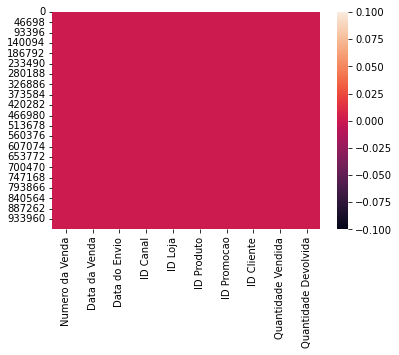

In [6]:
#Checando existência de colunas com dados NA

sns.heatmap(vendas_df.isna())

Constata-se que a base de licitação está limpa e sem valores faltantes no dataset.

C:\Users\diogo\AppData\Local\Temp/ipykernel_72184/2860684435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_teste['Data de Nascimento'] = pd.to_datetime(clientes_teste['Data de Nascimento'], format = '%d/%m/%Y')
C:\Users\diogo\AppData\Local\Temp/ipykernel_72184/2860684435.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_teste['Data de Nascimento'] = Hoje - clientes_teste['Data de Nascimento']
C:\Users\diogo\AppData\Local\Temp/ipykernel_72184/2860684435.py:8: SettingWithCopyWarning:

Feminino     19754
Masculino    19750
Name: Genero, dtype: int64

,count,mean,std,min,25%,50%,75%,max
Idade,39504.0,42.130822,18.11708,7.0,25.0,41.0,58.0,81.0


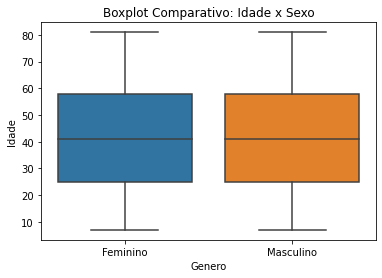

In [7]:
# Segmentação do perfil de compradores

clientes_teste = clientes_df[['Data de Nascimento','Genero']]

clientes_teste['Data de Nascimento'] = pd.to_datetime(clientes_teste['Data de Nascimento'], format = '%d/%m/%Y')
Hoje = pd.to_datetime(datetime.today(), format = '%d/%m/%Y')
clientes_teste['Data de Nascimento'] = Hoje - clientes_teste['Data de Nascimento']
clientes_teste['Data de Nascimento'] = clientes_teste['Data de Nascimento'] / 360
clientes_teste['Data de Nascimento'] = clientes_teste['Data de Nascimento'].astype(str) 
clientes_teste_01 = clientes_teste['Data de Nascimento'].str.split(" ", n = 1, expand = True)
clientes_teste_01['Idade']= clientes_teste_01[0]
clientes_teste_01 = clientes_teste_01[['Idade']]
clientes_teste_01 = clientes_teste_01.merge(clientes_teste, how='inner', left_index=True, right_index=True)
clientes_teste_01 = clientes_teste_01[['Idade','Genero']]
clientes_teste_01['Idade'] = clientes_teste_01['Idade'].astype(int) 


plt.title('Boxplot Comparativo: Idade x Sexo')
sns.boxplot(y='Idade', x='Genero', data=clientes_teste_01)


clientes_segmentação = clientes_teste_01['Genero'].value_counts()
display(clientes_segmentação)
clientes_teste_01.describe().T

Com o boxplot comparativo podemos concluir, por exemplo, que o dataset com as idades dos clientes apresentam um equilibrio de genero entre o sexo masculino e feminino.

# Processo de tratamento dos dados

No processo de ETL os dados são transformados e ajustados conforme a necessidade, dessa forma, esses dados podem ser atribuídas diferentes regras que vão ajudar a melhorar a sua qualidade.

In [8]:
# Ajustar tipo da coluna de data do dataset vendas_df

vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'], format='%d/%m/%Y')
vendas_df['Data do Envio'] = pd.to_datetime(vendas_df['Data do Envio'], format='%d/%m/%Y')

# Criar coluna de ano das datas

vendas_df['Ano da Venda'] = vendas_df['Data da Venda'].dt.year
vendas_df['Ano do Envio'] = vendas_df['Data do Envio'].dt.year

display(vendas_df)
vendas_df.info()

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Ano da Venda,Ano do Envio
0,1,2017-01-01,2017-01-02,1,86,981,2,6825,9,1,2017,2017
1,2,2017-01-01,2017-01-06,5,308,1586,2,18469,9,1,2017,2017
2,3,2017-01-01,2017-01-01,0,294,1444,5,19730,13,1,2017,2017
3,4,2017-01-01,2017-01-01,0,251,1468,5,29326,6,1,2017,2017
4,5,2017-01-01,2017-01-07,6,94,1106,2,22617,4,1,2017,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,2017-12-31,2017-12-31,0,194,2490,4,10353,120,0,2017,2017
980638,980639,2017-12-31,2018-01-06,6,32,2488,4,31750,120,0,2017,2018
980639,980640,2017-12-31,2018-01-03,3,210,2511,10,12003,80,0,2017,2018
980640,980641,2017-12-31,2017-12-31,0,53,436,4,25550,39,0,2017,2017


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Numero da Venda       980642 non-null  int64         
 1   Data da Venda         980642 non-null  datetime64[ns]
 2   Data do Envio         980642 non-null  datetime64[ns]
 3   ID Canal              980642 non-null  int64         
 4   ID Loja               980642 non-null  int64         
 5   ID Produto            980642 non-null  int64         
 6   ID Promocao           980642 non-null  int64         
 7   ID Cliente            980642 non-null  int64         
 8   Quantidade Vendida    980642 non-null  int64         
 9   Quantidade Devolvida  980642 non-null  int64         
 10  Ano da Venda          980642 non-null  int64         
 11  Ano do Envio          980642 non-null  int64         
dtypes: datetime64[ns](2), int64(10)
memory usage: 89.8 MB


In [9]:
# Retirar as colunas desnecessárias do dataset

clientes_df = clientes_df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis = 1)
display(clientes_df)

,ID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975
...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001


In [10]:
# Escolher colunas específicas

clientes_df = clientes_df[['ID Cliente','Primeiro Nome','Genero','Data de Nascimento']]
produtos_df = produtos_df[['ID Produto','Nome da Marca','Categoria']] 
lojas_df = lojas_df[['ID Loja','Nome da Loja']]

display(clientes_df)
display(produtos_df)
display(lojas_df)

,ID Cliente,Primeiro Nome,Genero,Data de Nascimento
0,1,Garnet,Feminino,12/05/1995
1,2,Lurette,Feminino,30/06/1943
2,3,Glenden,Masculino,09/04/1989
3,4,Baron,Masculino,17/11/1998
4,5,Sheree,Feminino,08/09/1975
...,...,...,...,...
39499,39500,Brandy,Masculino,27/07/1980
39500,39501,Alicia,Feminino,10/05/2001
39501,39502,Connie,Feminino,13/02/1997
39502,39503,Shawn,Masculino,29/03/2001


,ID Produto,Nome da Marca,Categoria
0,873,Contoso,Acessório para Computador
1,879,Contoso,Acessório para Computador
2,880,Contoso,Acessório para Computador
3,881,Contoso,Acessório para Computador
4,882,Contoso,Acessório para Computador
...,...,...,...
1685,1602,Southridge Video,Filme DVD
1686,1606,Southridge Video,Filme DVD
1687,1607,Southridge Video,Filme DVD
1688,1611,Southridge Video,Filme DVD


,ID Loja,Nome da Loja
0,1,Loja Contoso Seattle No.1
1,2,Loja Contoso Seattle No.2
2,3,Loja Contoso Kennewick
3,4,Loja Contoso Bellevue
4,5,Loja Contoso Redmond
...,...,...
301,306,Loja Contoso Europe Online
302,307,Loja Contoso Asia Online
303,308,Loja Contoso North America Reseller
304,309,Loja Contoso Europe Reseller


In [11]:
# Juntar os dataset

vendas_df = vendas_df.merge(produtos_df, on = 'ID Produto')
vendas_df = vendas_df.merge(lojas_df, on = 'ID Loja')
vendas_df = vendas_df.merge(clientes_df, on = 'ID Cliente')

display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Ano da Venda,Ano do Envio,Nome da Marca,Categoria,Nome da Loja,Primeiro Nome,Genero,Data de Nascimento
0,1,2017-01-01,2017-01-02,1,86,981,2,6825,9,1,2017,2017,A. Datum,Câmera Digital,Loja Contoso Austin,Rurik,Masculino,02/01/1979
1,880458,2017-11-23,2017-11-23,0,306,235,10,6825,8,0,2017,2017,Litware,Home Theater,Loja Contoso Europe Online,Rurik,Masculino,02/01/1979
2,191019,2017-03-20,2017-03-21,1,172,376,2,6825,9,0,2017,2017,Adventure Works,Laptop,Loja Contoso Hartford,Rurik,Masculino,02/01/1979
3,18610,2017-01-08,2017-01-10,2,200,448,2,6825,48,0,2017,2017,Wide World Importers,Desktop,Loja Contoso Catalog,Rurik,Masculino,02/01/1979
4,287704,2017-04-23,2017-04-26,3,76,280,1,6825,10,0,2017,2017,Contoso,Home Theater,Loja Contoso Beaumont No.1,Rurik,Masculino,02/01/1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,2017-11-23,2017-11-23,0,110,889,4,347,12,1,2017,2017,Contoso,Acessório para Computador,Loja Contoso Orlando,Esteban,Masculino,16/07/2006
980638,920243,2017-12-09,2017-12-10,1,261,1367,5,38781,13,0,2017,2017,Contoso,Telefone para Casa & Escritório,Loja Contoso Damascus No.1,Ruben,Masculino,02/10/2007
980639,467482,2017-06-21,2017-06-25,4,115,269,1,553,10,0,2017,2017,Contoso,Home Theater,Loja Contoso New York No.1,Allix,Feminino,24/12/1963
980640,853643,2017-11-13,2017-11-20,7,115,809,4,38860,6,0,2017,2017,Contoso,Acessório para Computador,Loja Contoso New York No.1,Anne,Feminino,31/05/1995


In [12]:
# Renomear o nome da coluna

vendas_df = vendas_df.rename(columns = {'Primeiro Nome' : 'Nome Cliente'})

In [13]:
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Ano da Venda,Ano do Envio,Nome da Marca,Categoria,Nome da Loja,Nome Cliente,Genero,Data de Nascimento
0,1,2017-01-01,2017-01-02,1,86,981,2,6825,9,1,2017,2017,A. Datum,Câmera Digital,Loja Contoso Austin,Rurik,Masculino,02/01/1979
1,880458,2017-11-23,2017-11-23,0,306,235,10,6825,8,0,2017,2017,Litware,Home Theater,Loja Contoso Europe Online,Rurik,Masculino,02/01/1979
2,191019,2017-03-20,2017-03-21,1,172,376,2,6825,9,0,2017,2017,Adventure Works,Laptop,Loja Contoso Hartford,Rurik,Masculino,02/01/1979
3,18610,2017-01-08,2017-01-10,2,200,448,2,6825,48,0,2017,2017,Wide World Importers,Desktop,Loja Contoso Catalog,Rurik,Masculino,02/01/1979
4,287704,2017-04-23,2017-04-26,3,76,280,1,6825,10,0,2017,2017,Contoso,Home Theater,Loja Contoso Beaumont No.1,Rurik,Masculino,02/01/1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,2017-11-23,2017-11-23,0,110,889,4,347,12,1,2017,2017,Contoso,Acessório para Computador,Loja Contoso Orlando,Esteban,Masculino,16/07/2006
980638,920243,2017-12-09,2017-12-10,1,261,1367,5,38781,13,0,2017,2017,Contoso,Telefone para Casa & Escritório,Loja Contoso Damascus No.1,Ruben,Masculino,02/10/2007
980639,467482,2017-06-21,2017-06-25,4,115,269,1,553,10,0,2017,2017,Contoso,Home Theater,Loja Contoso New York No.1,Allix,Feminino,24/12/1963
980640,853643,2017-11-13,2017-11-20,7,115,809,4,38860,6,0,2017,2017,Contoso,Acessório para Computador,Loja Contoso New York No.1,Anne,Feminino,31/05/1995


In [14]:
# Cliente que comprou mais vezes

frequencia_de_cliente = vendas_df['Nome Cliente'].value_counts()
display(frequencia_de_cliente)


Sydney       2278
Katherine    2258
Richard      2215
Marcus       2203
Devin        2188
             ... 
Chelsae         1
Pollyanna       1
Arty            1
Ramón           1
Edwina          1
Name: Nome Cliente, Length: 7713, dtype: int64

,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


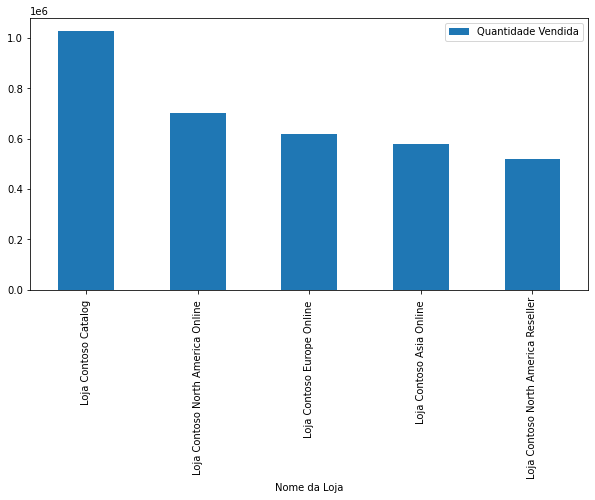

In [15]:
# Lojas que vendeu mais vezes

vendas_das_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_das_lojas = vendas_das_lojas[['Quantidade Vendida']]

# Ordenar o dataset do maior para o menor

vendas_das_lojas = vendas_das_lojas.sort_values('Quantidade Vendida', ascending = False)
display(vendas_das_lojas)

# Visão Gráfica das top 5 lojas

vendas_das_lojas = vendas_das_lojas[:5].plot(figsize = (10, 5), kind = 'bar')

In [16]:
# Média do período de entrega da mercadoria


vendas_df_entrega = vendas_df[['Categoria', 'Data da Venda', 'Data do Envio']]

Dias = vendas_df['Data do Envio'] - vendas_df['Data da Venda']

vendas_df_entrega['Diferença de Dias'] = Dias

vendas_df_entrega = vendas_df_entrega.groupby(['Categoria']).mean()

vendas_df_entrega = vendas_df_entrega['Diferença de Dias']

display(vendas_df_entrega)

C:\Users\diogo\AppData\Local\Temp/ipykernel_72184/2796896956.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_df_entrega['Diferença de Dias'] = Dias


Categoria
Acessório para Computador           2 days 04:17:56.574902888
Acessório para Câmera               2 days 04:30:55.818606202
Acessórios para Telefone & Tablet   2 days 03:56:14.829760403
Aparelho de Som                     2 days 04:36:18.748731822
Caneta Gravadora                    2 days 04:22:37.942511346
Câmera Digital                      2 days 04:42:52.447968285
Câmera Digital SLR                  2 days 04:29:27.738767493
Câmera e Filmadora                  2 days 04:27:48.585867701
DVD                                 2 days 04:23:15.032345659
Desktop                             2 days 04:24:29.784172661
Filme DVD                           2 days 04:09:12.173123586
Fone de Ouvido Bluetooth            2 days 04:02:28.556394100
Home Theater                        2 days 04:31:06.357122843
Impressora, Scanner & Fax           2 days 04:34:42.918445417
Laptop                              2 days 04:20:24.711917329
Monitor                             2 days 04:36:14.83942528

In [17]:
# Qual o % das vendas que foi devolvido.

qtde_vendida = vendas_df['Quantidade Vendida'].sum()
print('{}'.format(qtde_vendida))

qtde_devolvida = vendas_df['Quantidade Devolvida'].sum()
print('{}'.format(qtde_devolvida))

print('A taxa de devolução foi de {:.2%}.'.format(qtde_devolvida / qtde_vendida))

11851928
138931
A taxa de devolução foi de 1.17%.


In [18]:
# Qual o % das vendas da loja 'Loja Contoso Catalog' que foi devolvido.

vendas_Loja_Contoso_Catalog = vendas_df[vendas_df['ID Loja'] == 200]
display(vendas_Loja_Contoso_Catalog)


qtde_vendida_contoso = vendas_Loja_Contoso_Catalog['Quantidade Vendida'].sum()
print(qtde_vendida)

qtde_devolvida_contoso = vendas_Loja_Contoso_Catalog['Quantidade Devolvida'].sum()
print(qtde_vendida)

print('A taxa de devolução da Loja Contoso Europe Online foi de {:.2%}.'.format(qtde_devolvida_contoso / qtde_vendida_contoso))

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Ano da Venda,Ano do Envio,Nome da Marca,Categoria,Nome da Loja,Nome Cliente,Genero,Data de Nascimento
3,18610,2017-01-08,2017-01-10,2,200,448,2,6825,48,0,2017,2017,Wide World Importers,Desktop,Loja Contoso Catalog,Rurik,Masculino,02/01/1979
29,705272,2017-09-24,2017-09-24,0,200,716,3,21344,12,0,2017,2017,Proseware,"Impressora, Scanner & Fax",Loja Contoso Catalog,Makayla,Feminino,02/01/1993
30,915487,2017-12-07,2017-12-07,0,200,1551,4,21344,26,0,2017,2017,The Phone Company,Tablet,Loja Contoso Catalog,Makayla,Feminino,02/01/1993
68,91005,2017-02-07,2017-02-07,0,200,254,2,4743,18,0,2017,2017,Contoso,Home Theater,Loja Contoso Catalog,Emmie,Feminino,06/03/1980
122,9959,2017-01-05,2017-01-12,7,200,632,2,16915,24,1,2017,2017,Wide World Importers,Projetor,Loja Contoso Catalog,Conn,Masculino,05/01/1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978254,787097,2017-10-21,2017-10-21,0,200,1503,1,38055,10,0,2017,2017,The Phone Company,Tablet,Loja Contoso Catalog,Jenna,Feminino,25/02/2003
978256,806618,2017-10-27,2017-10-27,0,200,1204,1,38688,30,1,2017,2017,Fabrikam,Câmera e Filmadora,Loja Contoso Catalog,Zachary,Masculino,22/09/1955
978257,727130,2017-10-02,2017-10-04,2,200,854,1,37306,10,0,2017,2017,Contoso,Acessório para Computador,Loja Contoso Catalog,Morgan,Feminino,08/10/2013
978267,917655,2017-12-08,2017-12-08,0,200,856,4,39284,13,0,2017,2017,Contoso,Acessório para Computador,Loja Contoso Catalog,Calvin,Masculino,29/02/2000


11851928
11851928
A taxa de devolução da Loja Contoso Europe Online foi de 0.93%.


C:\Users\diogo\AppData\Local\Temp/ipykernel_72184/3872513075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_Loja_Contoso_Catalog['Mês do Envio'] = vendas_Loja_Contoso_Catalog['Data do Envio'].dt.month


{2017, 2018}

Numero da Venda  ID Canal  \
Mês do Envio Categoria                                                      
1            Acessório para Computador                 36580111       883   
             Acessório para Câmera                     14562337       319   
             Acessórios para Telefone & Tablet          4732541       108   
             Aparelho de Som                           13393828       134   
             Caneta Gravadora                           3341160        42   
...                                                         ...       ...   
12           Sistema Audivisual para Carro            124177654       291   
             Smartphone                               145509439       345   
             Tablet                                   216805434       524   
             Telefone para Casa & Escritório          258065261       552   
             Televisão                                 81080284       213   

                                                ID Loja  ID Produto  \
Mês do Envio Categoria                                                
1            Acessório para Computador            87000      361495   
             Acessório para Câmera                29600      189211   
             Acessórios para Telefone & Tablet    10000      125143   
             Aparelho de Som                      10800         952   
             Caneta Gravadora                      2800         666   
...                                                 ...         ...   
12           Sistema Audivisual para Carro        26600       41752   
             Smartphone                           31200      224470   
             Tablet                               46400      352365   
             Telefone para Casa & Escritório      55000      373356   
             Televisão                            17400       11484   

                                                ID Promocao  ID Cliente  \
Mês do Envio Categoria                                                    
1            Acessório para Computador                  916     8545797   
             Acessório para Câmera                      316     2984295   
             Acessórios para Telefone & Tablet          106     1023130   
             Aparelho de Som                            132     1101544   
             Caneta Gravadora                            34      248887   
...                                                     ...         ...   
12           Sistema Audivisual para Carro              532     2579979   
             Smartphone                                 624     3106577   
             Tablet                                     928     4683893   
             Telefone para Casa & Escritório           1100     5296428   
             Televisão                                  348     1828226   

                                                Quantidade Vendida  \
Mês do Envio Categoria                                               
1            Acessório para Computador                        7247   
             Acessório para Câmera                            2688   
             Acessórios para Telefone & Tablet               12360   
             Aparelho de Som                                   967   
             Caneta Gravadora                                  178   
...                                                            ...   
12           Sistema Audivisual para Carro                    2450   
             Smartphone                                       3305   
             Tablet                                           5052   
             Telefone para Casa & Escritório                  5940   
             Televisão                                        1435   

                                                Quantidade Devolvida  \
Mês do Envio Categoria                                                 
1            Acessório para Computador                           101   
             Acessó

,Quantidade Devolvida
Mês do Envio,
1,814
2,709
3,786
4,797
5,803
6,786
7,786
8,820
9,812


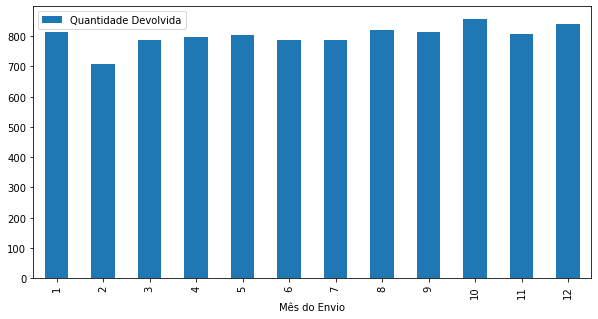

In [19]:
#Analise do período(mês) que houve maior número de devoluções da loja 'Loja Contoso Catalog'.

vendas_Loja_Contoso_Catalog['Mês do Envio'] = vendas_Loja_Contoso_Catalog['Data do Envio'].dt.month

vendas_Loja_Contoso_Catalog_Anos = set(vendas_Loja_Contoso_Catalog['Ano do Envio'])
display(vendas_Loja_Contoso_Catalog_Anos)


vendas_Loja_Contoso_Catalog_teste1 = vendas_Loja_Contoso_Catalog.groupby(['Mês do Envio', 'Categoria']).sum()

display(vendas_Loja_Contoso_Catalog_teste1)

vendas_Loja_Contoso_Catalog_teste1 = vendas_Loja_Contoso_Catalog.reset_index()

vendas_Loja_Contoso_Catalog_teste1 = (vendas_Loja_Contoso_Catalog_teste1[['Mês do Envio', 'Quantidade Devolvida']])

vendas_Loja_Contoso_Catalog_teste2 = vendas_Loja_Contoso_Catalog_teste1.groupby(['Mês do Envio']).sum()
display(vendas_Loja_Contoso_Catalog_teste2)

fig = vendas_Loja_Contoso_Catalog_teste2.plot(figsize = (10, 5), kind = 'bar')

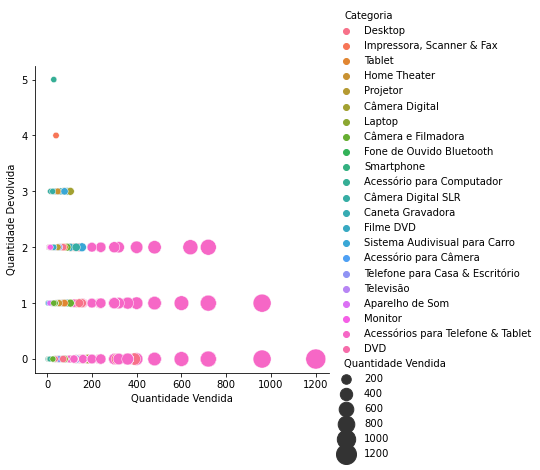

In [20]:
# Demonstração que o volume de devoluções independe da quantidade vendida.

sns.relplot( x = "Quantidade Vendida", y = 'Quantidade Devolvida', hue = 'Categoria', size = 'Quantidade Vendida', sizes = (30, 400) ,data = vendas_Loja_Contoso_Catalog)

In [21]:
# Dataset das vendas da loja 'Loja Contoso Catalog' que não houve devolução.

vendas_sem_devolucao = vendas_df[(vendas_df['ID Loja'] == 200) & (vendas_df['Quantidade Devolvida'] == 0)]
vendas_sem_devolucao = vendas_sem_devolucao.sort_values('Quantidade Vendida', ascending = False)


display(vendas_sem_devolucao)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Ano da Venda,Ano do Envio,Nome da Marca,Categoria,Nome da Loja,Nome Cliente,Genero,Data de Nascimento
767930,850075,2017-11-12,2017-11-12,0,200,2517,4,21737,1200,0,2017,2017,Contoso,Acessórios para Telefone & Tablet,Loja Contoso Catalog,Carlos,Masculino,02/03/1990
566389,891966,2017-11-28,2017-11-28,0,200,2489,4,9242,960,0,2017,2017,Contoso,Acessórios para Telefone & Tablet,Loja Contoso Catalog,Alanah,Feminino,07/09/1943
664940,874886,2017-11-21,2017-11-26,5,200,2506,4,15872,720,0,2017,2017,Contoso,Acessórios para Telefone & Tablet,Loja Contoso Catalog,Darb,Masculino,18/01/1987
238560,910345,2017-12-05,2017-12-11,6,200,2502,4,9715,720,0,2017,2017,Contoso,Acessórios para Telefone & Tablet,Loja Contoso Catalog,Maurizia,Feminino,15/10/1983
551492,871152,2017-11-20,2017-11-21,1,200,2503,4,8387,720,0,2017,2017,Contoso,Acessórios para Telefone & Tablet,Loja Contoso Catalog,Caron,Feminino,18/03/2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108571,179669,2017-03-15,2017-03-15,0,200,986,2,13565,4,0,2017,2017,A. Datum,Câmera Digital,Loja Contoso Catalog,Smitty,Masculino,17/12/2005
272364,173906,2017-03-13,2017-03-13,0,200,1441,2,22195,4,0,2017,2017,The Phone Company,Smartphone,Loja Contoso Catalog,Elijah,Feminino,04/08/1968
59480,204445,2017-03-26,2017-03-26,0,200,331,2,17892,4,0,2017,2017,Southridge Video,Sistema Audivisual para Carro,Loja Contoso Catalog,Hilliard,Masculino,10/04/1997
934816,189547,2017-03-20,2017-03-22,2,200,1190,2,34989,4,0,2017,2017,Fabrikam,Câmera e Filmadora,Loja Contoso Catalog,Adrian,Masculino,02/03/2000


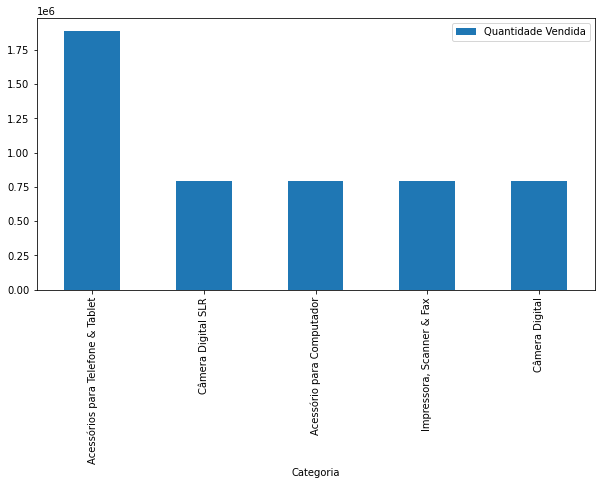

In [22]:
# Categoria que vendeu mais vezes

vendas_sem_devolucao_categoria = vendas_df[(vendas_df['ID Loja'] == 200) & (vendas_df['Quantidade Devolvida'] == 0)]
vendas_sem_devolucao_categoria = vendas_df.groupby('Categoria').sum()
vendas_sem_devolucao_categoria = vendas_sem_devolucao_categoria[['Quantidade Vendida']]

# Ordenar o dataset do maior para o menor

vendas_sem_devolucao_categoria = vendas_sem_devolucao_categoria.sort_values('Quantidade Vendida', ascending = False)

# Visão Gráfica das top 5 lojas

vendas_sem_devolucao_categoria = vendas_sem_devolucao_categoria[:5].plot(figsize = (10, 5), kind = 'bar')

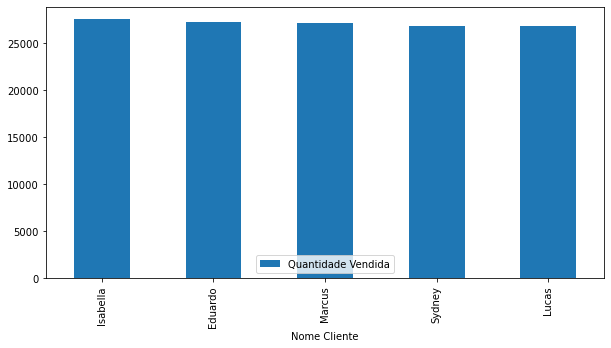

In [23]:
# Cliente que vendeu mais vezes

vendas_sem_devolucao_cliente = vendas_df[(vendas_df['ID Loja'] == 200) & (vendas_df['Quantidade Devolvida'] == 0)]
vendas_sem_devolucao_cliente = vendas_df.groupby('Nome Cliente').sum()
vendas_sem_devolucao_cliente = vendas_sem_devolucao_cliente[['Quantidade Vendida']]

# Ordenar o dataset do maior para o menor

vendas_sem_devolucao_cliente = vendas_sem_devolucao_cliente.sort_values('Quantidade Vendida', ascending = False)

# Visão Gráfica das top 5 lojas

vendas_sem_devolucao_cliente = vendas_sem_devolucao_cliente[:5].plot(figsize = (10, 5), kind = 'bar')

# Exportação do dataset



In [24]:
# Exportar dataset da Loja Contoso Europe Online em formato CSV

vendas_df.to_csv('Loja Contoso Europe Online.csv', sep=';')